In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [169]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [170]:
df.shape

(200, 6)

In [171]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [172]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [174]:
print('Maximum Age is: ', df.Age.max())
print('Minimum Age is: ', df.Age.min())

Maximum Age is:  74
Minimum Age is:  15


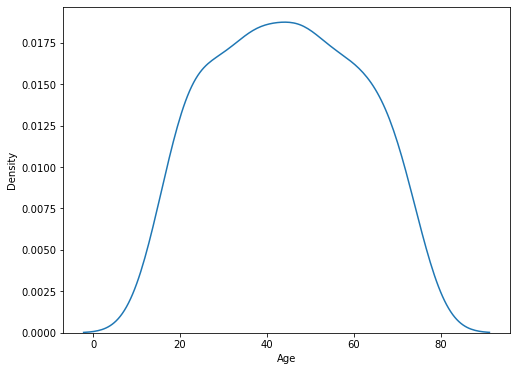

In [175]:
plt.figure(figsize=(8,6))
sns.kdeplot(x='Age', data = df)
plt.show()

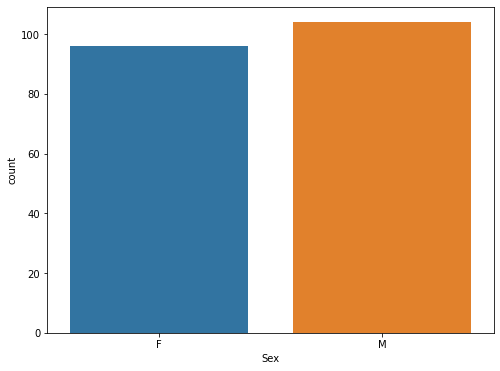

In [176]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data = df)
plt.show()

In [177]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

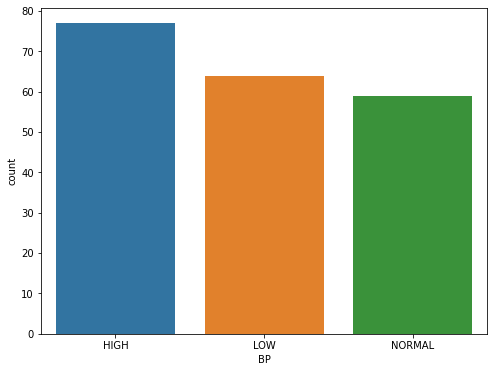

In [178]:
plt.figure(figsize=(8,6))
sns.countplot(x='BP', data = df)
plt.show()

In [179]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

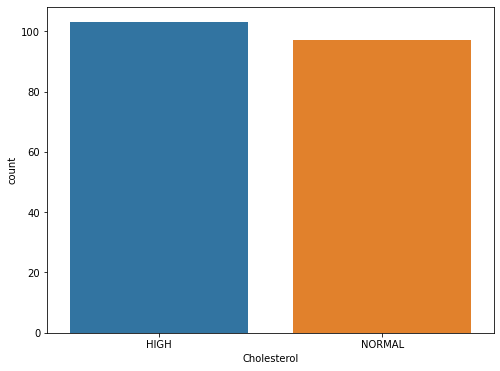

In [180]:
plt.figure(figsize=(8,6))
sns.countplot(x='Cholesterol', data=df)
plt.show()

In [181]:
print('Maximum Na_to_K: ', df.Na_to_K.max())
print('Minimum Na_to_k: ', df.Na_to_K.min())
print('Total Mean value of: ', df.Na_to_K.mean())

Maximum Na_to_K:  38.247
Minimum Na_to_k:  6.269
Total Mean value of:  16.08448499999999


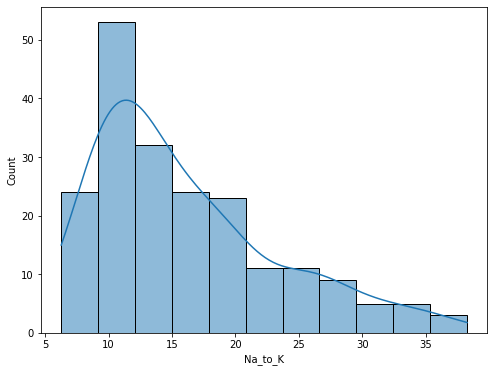

In [182]:
plt.figure(figsize=(8,6))
sns.histplot(df.Na_to_K, kde = True)
plt.show();

In [183]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

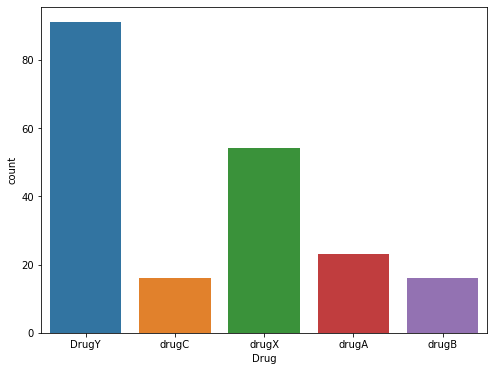

In [184]:
plt.figure(figsize=(8,6))
sns.countplot(x='Drug', data = df)
plt.show()

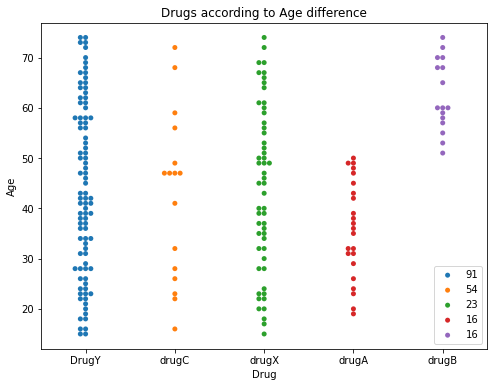

In [185]:
plt.figure(figsize=(8,6))
sns.swarmplot(x='Drug', y='Age', data=df)
plt.title('Drugs according to Age difference')
plt.legend(df.Drug.value_counts())
plt.show()

In [186]:
print('Maximum age of DrugA: ',df.Age[df.Drug == 'drugA'].max())
print('Minimum age of DrugB: ', df.Age[df.Drug == 'drugB'].min())

Maximum age of DrugA:  50
Minimum age of DrugB:  51


In [187]:
# Filter Drug according to sex

df_drug_sex = df.groupby(['Drug', 'Sex']).size().reset_index(name = 'Count')
df_drug_sex

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


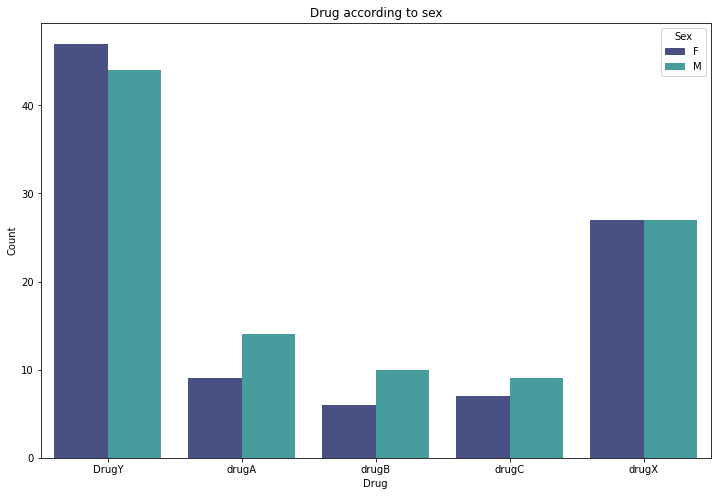

In [188]:
plt.figure(figsize=(12,8))
sns.color_palette("Paired")
sns.barplot(x='Drug', y='Count', hue='Sex', data=df_drug_sex, palette='mako')
plt.title('Drug according to sex')
plt.show()

In [189]:
# filtering drug according to bp
df_bp_drug = df.groupby(['Drug','BP']).size().reset_index(name='Count')
df_bp_drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


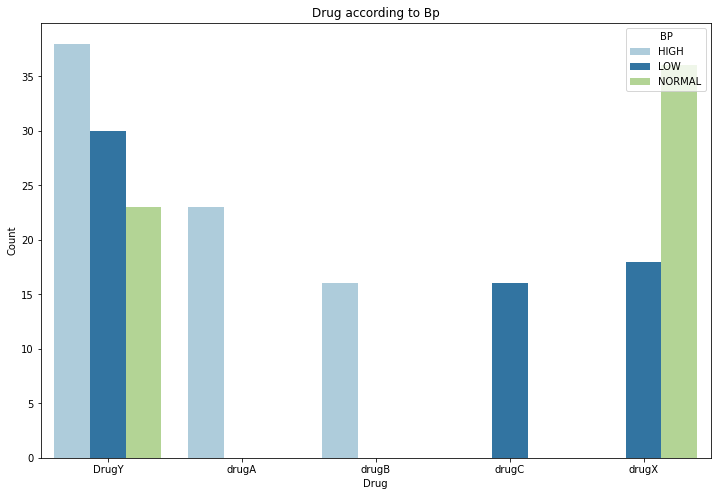

In [190]:
plt.figure(figsize=(12,8))
sns.barplot(x='Drug', y='Count', hue='BP', data=df_bp_drug, palette='Paired')
plt.title('Drug according to Bp')
plt.show()

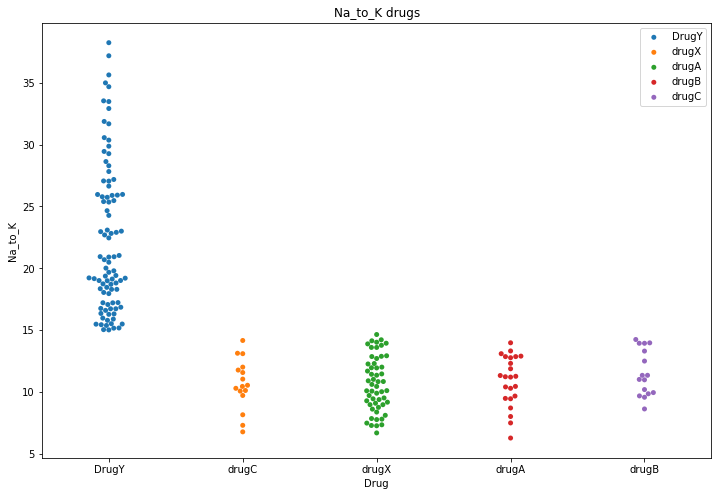

In [191]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Drug', y='Na_to_K', data=df)
plt.title('Na_to_K drugs')
plt.legend(df.Drug.value_counts().index)
plt.show()

In [192]:
# filtering cholesterol according to drug

df_ch = df.groupby(['Drug', 'Cholesterol']).size().reset_index(name='Count')
df_ch

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


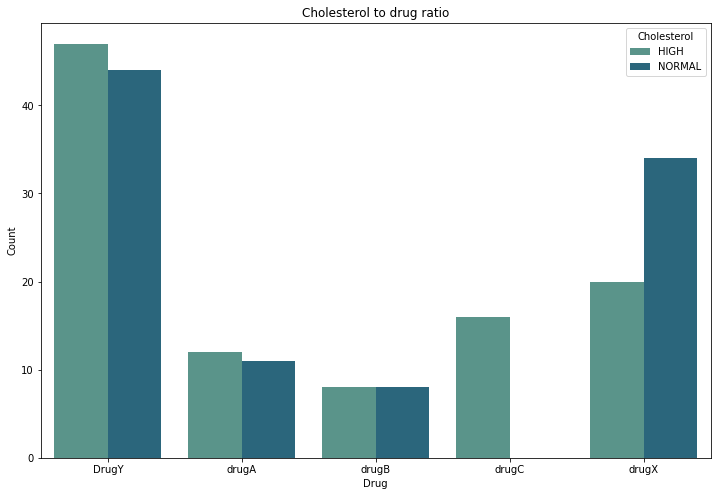

In [193]:
plt.figure(figsize=(12,8))
sns.barplot(x='Drug', y='Count', hue = 'Cholesterol', data=df_ch, palette='crest')
plt.title('Cholesterol to drug ratio')
plt.show()

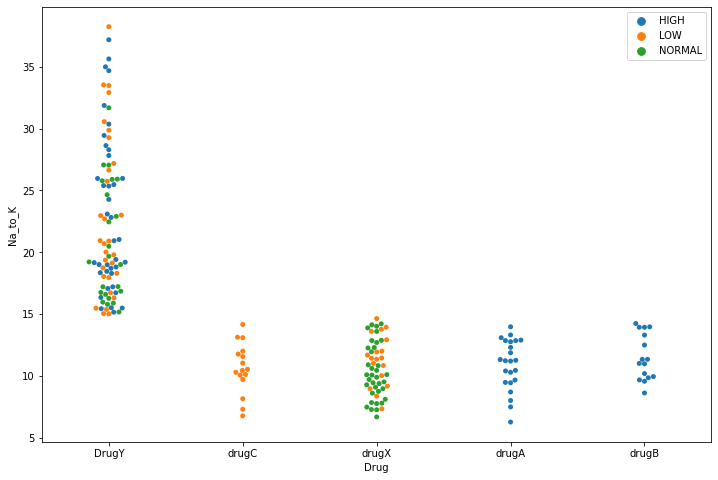

In [194]:
# na_to_k to bp to drug
plt.figure(figsize=(12,8))
sns.swarmplot(x='Drug', y='Na_to_K', hue='BP', data=df)
plt.legend()
plt.show()

# Feature Engineering and Data Preparing

In [195]:
df['Na_to_k_greater_than_15'] = [1 if i >= 15 else 0 for i in df.Na_to_K]
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_k_greater_than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


In [196]:
df_15 = df.groupby(['Drug', 'Na_to_k_greater_than_15']).size().reset_index(name='Count')
df_15

,Drug,Na_to_k_greater_than_15,Count
0,DrugY,1,91
1,drugA,0,23
2,drugB,0,16
3,drugC,0,16
4,drugX,0,54


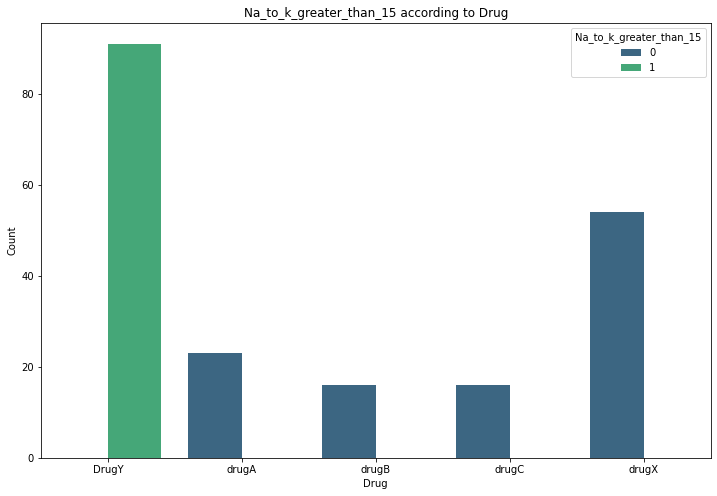

In [197]:
plt.figure(figsize=(12,8))
sns.barplot(x='Drug', y='Count',  hue='Na_to_k_greater_than_15',data=df_15, palette='viridis')
plt.title('Na_to_k_greater_than_15 according to Drug')
plt.show()

# Label Encoding to Data 

In [248]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

In [271]:
label_list = df

for l in label_list:
    label_encoder(l)

In [272]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_k_greater_than_15
0,8,0,0,0,167,0,1
1,30,1,1,0,89,3,0
2,30,1,1,0,43,3,0
3,12,0,2,0,10,4,0
4,44,0,1,0,133,0,1


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      200 non-null    int64
 1   Sex                      200 non-null    int64
 2   BP                       200 non-null    int64
 3   Cholesterol              200 non-null    int64
 4   Na_to_K                  200 non-null    int64
 5   Drug                     200 non-null    int64
 6   Na_to_k_greater_than_15  200 non-null    int64
dtypes: int64(7)
memory usage: 11.1 KB


# Splitting Data into Traning and Testing 

In [274]:
from sklearn.model_selection import train_test_split

X = df.drop(["Drug"], axis =1 )
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


In [282]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv = 5)
knn.fit(x_train,y_train)

print("Train Score:", np.mean(accuracies))
print("Test Score:", knn.score(x_test,y_test))

Train Score: 0.61875
Test Score: 0.725


In [283]:
result_dict_train = {}
result_dict_test = {}

In [284]:
result_dict_train["KNN Default Train Score"] = np.mean(accuracies)
result_dict_test["KNN Default Test Score"] = knn.score(x_test,y_test)

In [286]:
grid = {'n_neighbors':np.arange(1,120),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier(algorithm = "auto")
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(x_test,y_test))

Hyperparameters: {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Train Score: 0.725
Test Score: 0.8


In [287]:
result_dict_train["KNN GridSearch Train Score"] = knn_cv.best_score_
result_dict_test["KNN GridSearch Test Score"] = knn_cv.score(x_test,y_test)

In [288]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:", rfc.score(x_test,y_test))

Train Score: 0.99375
Test Score: 1.0


In [289]:
result_dict_train["Random Forest Default Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Default Test Score"] = rfc.score(x_test,y_test)

In [290]:
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy']
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(x_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(x_test,y_test))

Hyperparameters: {'criterion': 'gini', 'n_estimators': 100}
Train Score: 0.99375
Test Score: 1.0


In [291]:
result_dict_train["Random Forest GridSearch Train Score"] = rf_cv.best_score_
result_dict_test["Random Forest GridSearch Test Score"] = rf_cv.score(x_test,y_test)

In [292]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, x_train, y_train, cv=5)
svc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))

Train Score: 0.6875
Test Score: 0.775


In [293]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(x_test,y_test)

In [294]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(x_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(x_test,y_test))

Best Parameters: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.96875
Test Score: 1.0


In [295]:
result_dict_train["SVM GridSearch Train Score"] = svm_cv.best_score_
result_dict_test["SVM GridSearch Test Score"] = svm_cv.score(x_test,y_test)

In [296]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

,Score
KNN Default Train Score,0.61875
KNN GridSearch Train Score,0.72500
Random Forest Default Train Score,0.99375
Random Forest GridSearch Train Score,0.99375
SVM Default Train Score,0.68750
SVM GridSearch Train Score,0.96875


In [297]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
KNN Default Test Score,0.725
KNN GridSearch Test Score,0.800
Random Forest Default Test Score,1.000
Random Forest GridSearch Test Score,1.000
SVM Default Test Score,0.775
SVM GridSearch Test Score,1.000


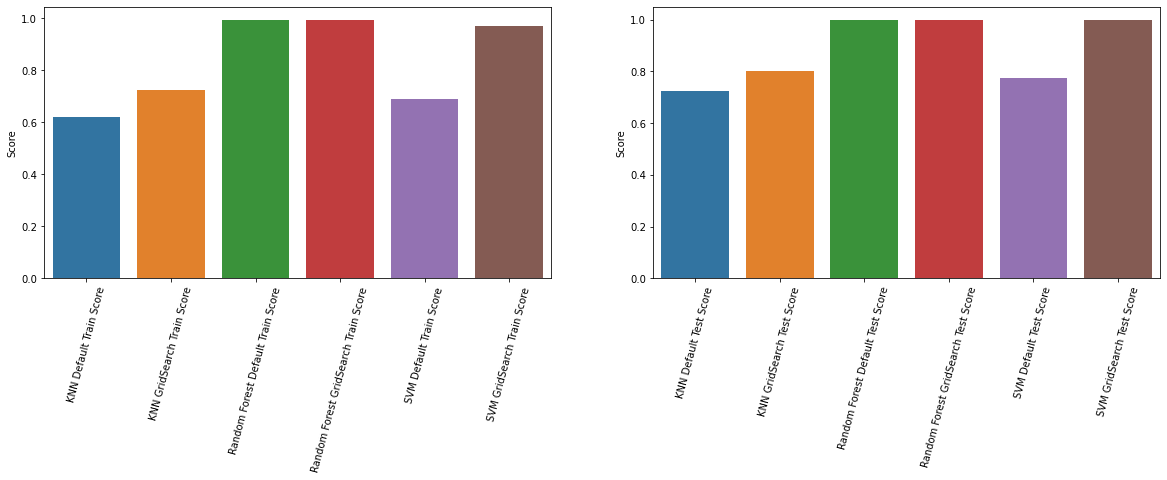

In [298]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()